<a href="https://colab.research.google.com/github/urieliram/ETL_overload/blob/main/Tarea11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import itertools
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.core.pylabtools import figsize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
%matplotlib inline
!sudo pip3 install keras

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import LocallyConnected1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
print(tf.__version__)
from matplotlib import pyplot as plt
from random import randint

import keras
from   keras.models import Sequential
from   keras.layers import Dense

2.8.0


##Predicción de sobrecarga en grupos de líneas de transmisión.
En esta sección se usará inferencia bayesiana para ajustar un modelo de regresión logística a datos de violación de flujo de potencia eléctrica en grupos de líneas de transmisión, que interconectan regiones eléctricas. La variable dependientes es de naturaleza binaria con un valor de uno si la línea presenta sobrecarga y cero si no. Las variables independientes son el flujo neto máximo y mínimo en la región eléctrica en un día y se calcula como la diferencia entre la demanda menos la generación en cada región.

In [3]:
df = pd.read_csv('overload.csv')
df = df.assign(const=1)
dfy = df[['L3','L5','L6','L7','L14','L15','L22','L31','L38','L39','L51','L58','L65']] #Se escoge le número de línea de transmisión
dfx = df[['CEN','NES','NOR','NTE','OCC','ORI','PEN','CEN_min','NES_min','NOR_min','NTE_min','OCC_min','ORI_min','PEN_min']] ## Predictors

X = dfx.to_numpy()
y = dfy.to_numpy()

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

## Crea conjuntos de datos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7) #, random_state = 5

#df.sample(5)
#df.describe()
# df.head()

A continuación se enlista las configuraciones de red usadas en el libro (para resolver el problema *11.7 Example: ZIP Code Data*). 
*   Net-1: Sin capa oculta, equivalente a regresión logística multinomial.
*   Net-2: Una capa oculta, 12 unidades ocultas totalmente conectadas.
*   Net-3: Dos capas ocultas conectadas localmente.
*   Net-4: Dos capas ocultas, conectadas localmente con peso compartido.
*   Net-5: dos capas ocultas, conectadas localmente, dos niveles de peso compartido.

Trataremos de replicar el ejercicio aplicando a nuestros datos. A diferencia del problema de 2dimensiones del libro , usaremos redes para una sola dimensión para predecir un vector de Binarios (Sobrecarga o no de algunas líneas de tranmisión) a partir de un vector de datos reales (datos de demanda de las regiones eléctricas). También mencionan que todas las redes tienen unidades de salida sigmoidales y el ajuste es con mínimpos cuadrados.


In [4]:
#https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5
## Neural network


input_dim   = 14
num_classes = 26 ## {salidas}

model  = Sequential()

## Net-Uriel
model.add(Dense(units = num_classes, input_dim = 14, activation='sigmoid' )) ## FUNCIONA !!! , activation='relu',
model.add(Dense(units = num_classes, input_dim = 7, activation='relu' )) ## FUNCIONA !!! , activation='relu',
model.add(Dense(units = num_classes, input_dim = 3, activation='relu' )) ## FUNCIONA !!! , activation='relu',


'''
## Net-1
model.add(Dense(units = num_classes, input_dim = 14, activation='sigmoid' )) ## FUNCIONA !!! , activation='relu',
'''

'''
## Net-2
model.add(Dense(units=12, input_dim = input_dim,  activation ='sigmoid' )) ## FUNCIONA !!!
model.add(Dense(units=num_classes,         activation ='sigmoid'))
'''

'''
## Net-3
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = LocallyConnected1D(1, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
layer2 = LocallyConnected1D(1, 5, activation='sigmoid', name = 'layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
'''

'''
## Net-4
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = Conv1D(filters=2, kernel_size=2, strides=2, activation='sigmoid', name='layer1')(input_) 
layer2 = LocallyConnected1D(1, 5, activation='sigmoid', name='layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
'''

'''
## Net-5
input_dim = (14,1)
input_ = Input(input_dim, name = 'the_input')
layer1 = Conv1D(2, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
layer2 = Conv1D(4, 5, activation='sigmoid', name = 'layer2')(layer1)
layer3 = Flatten(name='layer3')(layer2) 
output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)
model = Model(inputs = input_, outputs = output)
input_dim = np.expand_dims(input_dim, axis=0)
'''


'''
## LeNet5
Hg = 200
Lng = 80

#Layer 1
#Conv Layer 1
input_dim = (14,1)
model.add(Conv1D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', 
                 input_shape = input_dim ))
#Pooling layer 1
model.add(MaxPooling1D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv1D(filters = 16, kernel_size = 5,strides = 1,activation = 'relu',
                 input_shape = input_dim ))
#Pooling Layer 2
model.add(MaxPooling1D(pool_size = 2, strides = 2))

#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 2, activation = 'sigmoid'))
'''

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                390       
                                                                 
 dense_1 (Dense)             (None, 26)                702       
                                                                 
 dense_2 (Dense)             (None, 26)                702       
                                                                 
Total params: 1,794
Trainable params: 1,794
Non-trainable params: 0
_________________________________________________________________


In [5]:
#parametros https://www.tensorflow.org/api_docs/python/tf/keras/Model
#RMSprop, categorical_crossentropy, adam, binary_crossentropy, categorical_crossentropy, sgd
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [6]:
epochs     = 100 
batch_size = 64
verbose    = 0
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose) 

In [7]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [8]:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 18.29787234042553


In [9]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size,verbose=verbose) #epochs =200 batch_size =64

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


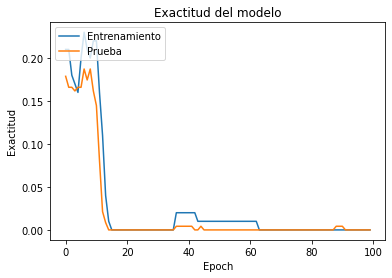

In [10]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

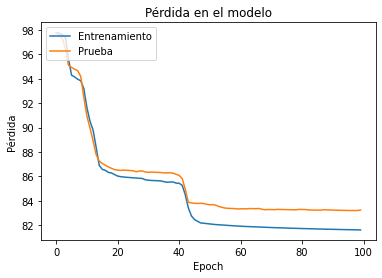

In [11]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Pérdida en el modelo') 
plt.ylabel('Pérdida') 
plt.xlabel('Epoch') 
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left') 
plt.show()

### **Conclusión:** 
Hemos utilizado la API funcional de **Keras** para implementar diferentes estructuras de redes neuronales para predicción de sobrecarga en líneas de transmisión de acuerdo a la demanda en las regiones.

Los resultadosindica que la mejor estructura es........... sin embargo, el ............ algunas ventajas ya que da la posibilidad de ................, mientrass.

Otra cosa que observamos es que .............., los rendimientos de predicción son similares. Esto quiere decir que a medida que crece el conjunto de datos los resultados deberían converger en la misma solución.

[Losses KERAS](https://keras.io/api/losses/)

[Ejemplos KERAS](https://keras.io/examples/)

[Model class API](https://faroit.com/keras-docs/1.2.2/models/model/)

[The Functional API TUTORIAL](https://keras.io/guides/functional_api/)

[https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee](https://gist.github.com/jkleint/1d878d0401b28b281eb75016ed29f2ee)

[Introduction to 1D Convolutional Neural Networks in Keras for Time Sequences](https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf)

[1D Convolutional Neural Network Models for Human Activity Recognition](https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/)

In [12]:
#https://stackoverflow.com/questions/49161174/tensorflow-logits-and-labels-must-have-the-same-first-dimension

#n_class = 2
#n_features = 14
#inputs = keras.Input(shape=(n_features,))

#inputs.shape
#inputs.dtype

#dense = layers.Dense(14, activation = "sigmoid")
#x = dense(inputs)

#x = layers.Dense(14, activation="sigmoid")(x)
#outputs = layers.Dense(14)(x)

#outputs = x

#model = keras.Model(inputs=inputs, outputs=outputs, name = "overload_model")

#np.expand_dims(inputs,axis=0)

#model.summary()

#keras.utils.plot_model(model, "fig_t11_1.png")
#keras.utils.plot_model(model, "fig_t11_2.png", show_shapes=True)

In [13]:
#from keras.models import Model
#from keras.layers import Input, Dense

#a = Input(shape=(32,))
#b = Dense(32)(a)
#model = Model(Input=a, Output=b)
#compile(self, optimizer, loss, metrics=None, loss_weights=None, sample_weight_mode=None)
#fit(self, x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

In [14]:
#model.compile(
#    loss      = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
#    optimizer = keras.optimizers.RMSprop(),
#    metrics=["accuracy"],
#)

#history = model.fit(x_train, y_train, batch_size=14, epochs=2, validation_split=0.2)

#test_scores = model.evaluate(x_test, y_test, verbose=2)
#print("Test loss:", test_scores[0])
#print("Test accuracy:", test_scores[1])